In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

### Эксперимент

In [2]:
from hypers import weight_hypers
from hypers import alpha_hypers 

from draw import draw_all

In [3]:
from experiment import run_experiments, load_experiments
filepath = '../results/df_experiment_2.csv'

In [4]:
# length = 2000
# lower_bound, upper_bound = 100, 400

windows = [5, 10, 20, 50, 100]
interesting_w = ["default", "simple_101", "slow", "const"]
interesting_a = []


experiments, df = run_experiments(windows, interesting_w, interesting_a, filepath)
# df = pd.read_csv(filepath, index_col=0, sep='\t')
### !legacy experiments = load_experiments('../results/experiment_1.json')

100%|████████████████████████████████████████████████████████████████████████| 2875/2875 [01:23<00:00, 34.32it/s]


In [22]:
df_w = df[df["alpha_function"] == "1 / (x + 1)"].iloc[:, :4]
df_tolatex = df_w[(df["weight_function"] == "1 / ((x + 1) * (ln(x + 1))^2)") | (df["weight_function"] == "1 / (x^1.01)")].iloc[:6]
# print(df_tolatex.to_latex(index=False))
df_tolatex

,train_window,weight_function,alpha_function,mean
1,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),224307.80
0,5,1 / (x^1.01),1 / (x + 1),175677.06
5,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),142566.48
4,10,1 / (x^1.01),1 / (x + 1),98022.98
9,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),135308.02
8,20,1 / (x^1.01),1 / (x + 1),93522.27


In [6]:
df_a = df[df["weight_function"] == "1 / (x^1.01)"].iloc[:,:4]
df_a

,train_window,weight_function,alpha_function,mean
0,5,1 / (x^1.01),1 / (x + 1),175677.06
4,10,1 / (x^1.01),1 / (x + 1),98022.98
8,20,1 / (x^1.01),1 / (x + 1),93522.27
12,50,1 / (x^1.01),1 / (x + 1),97444.54
16,100,1 / (x^1.01),1 / (x + 1),101428.93


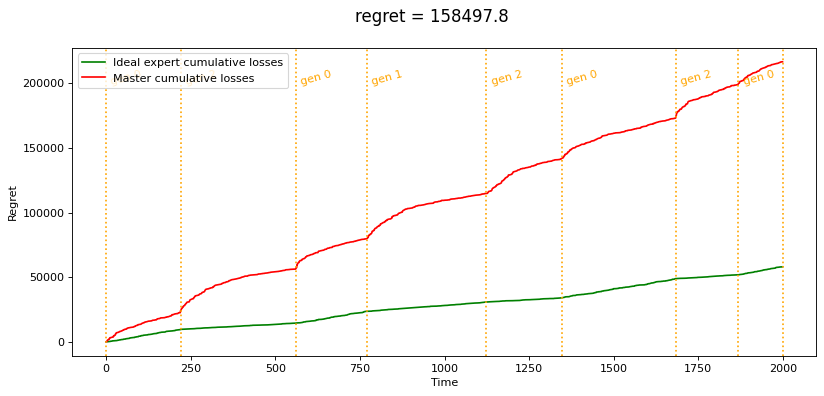

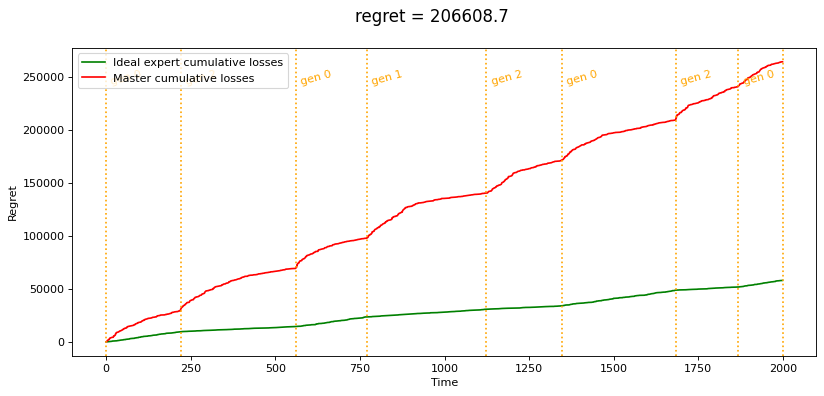

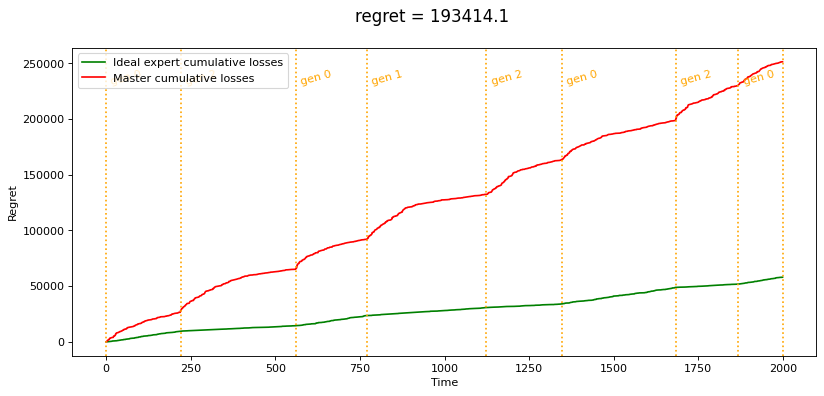

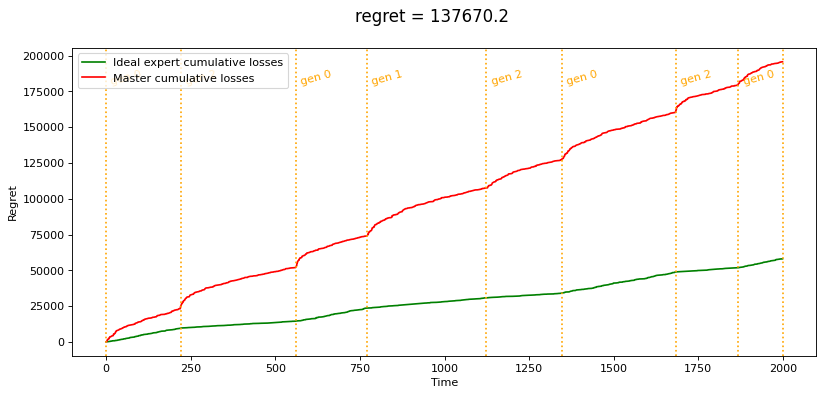

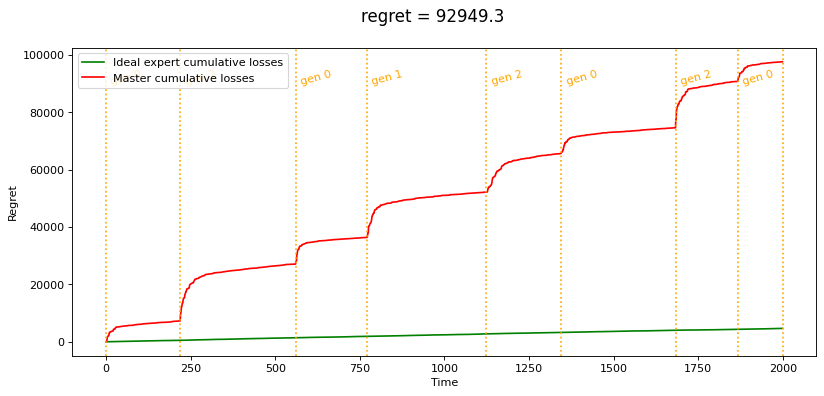

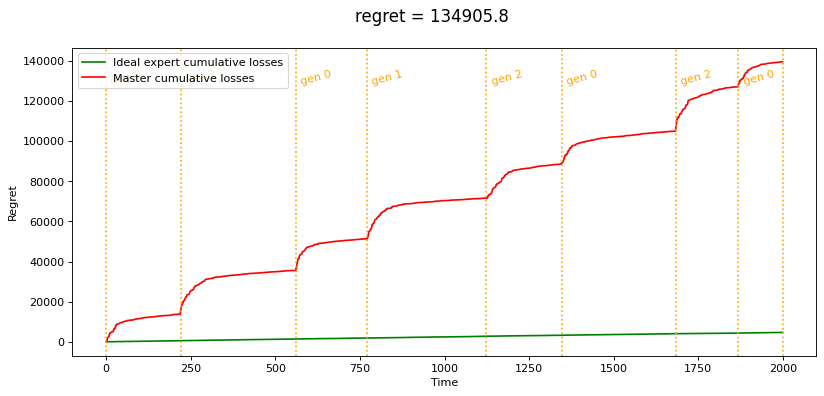

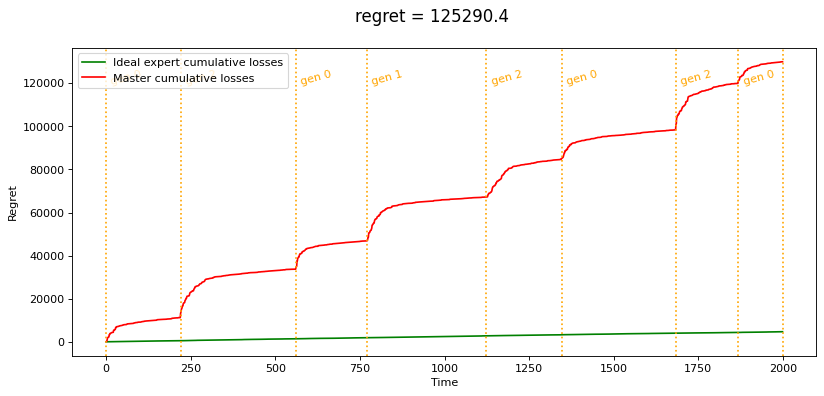

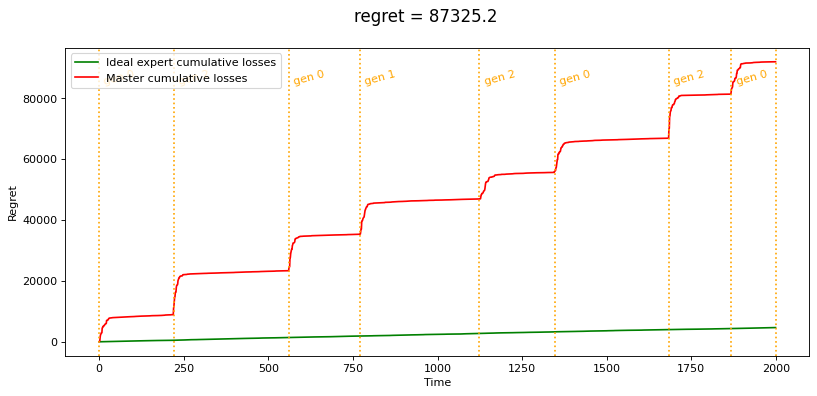

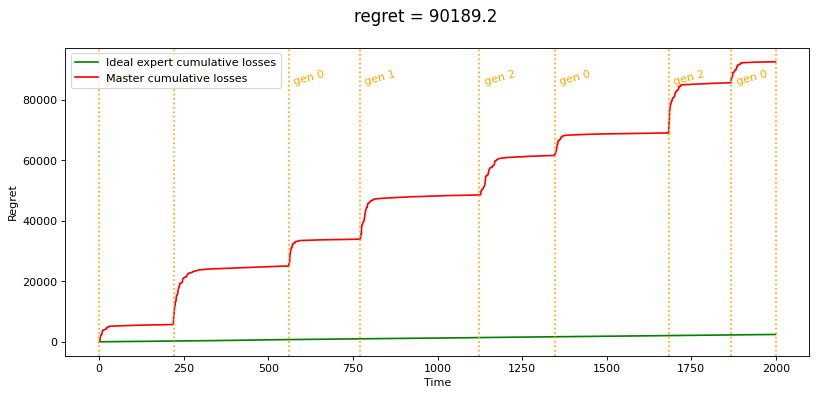

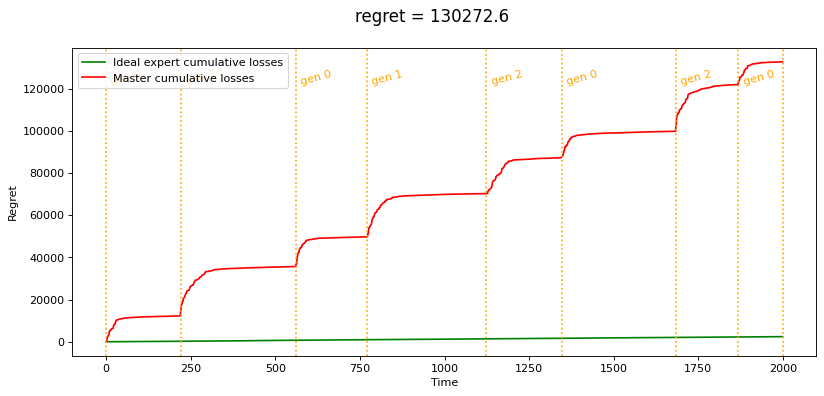

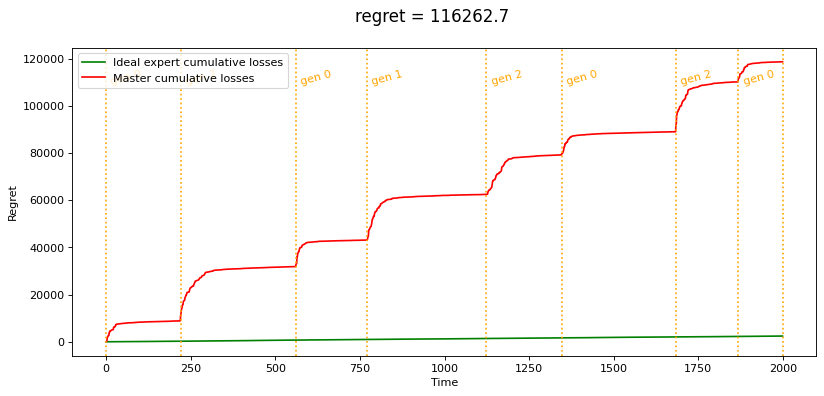

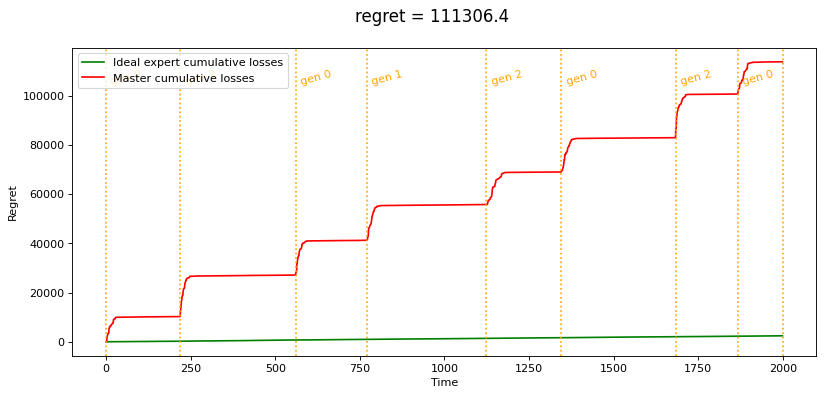

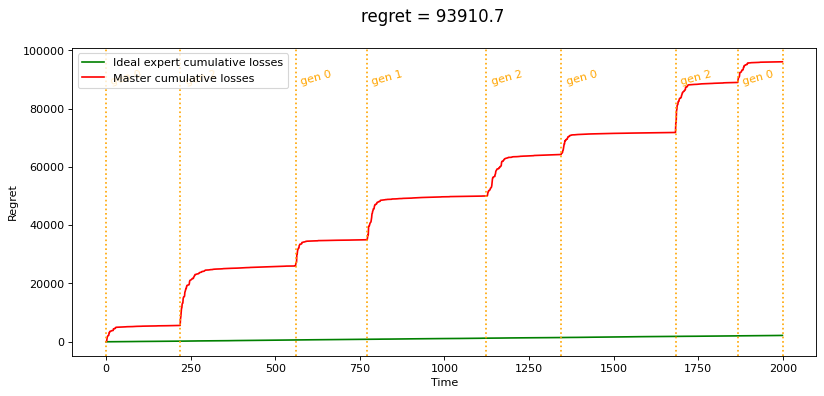

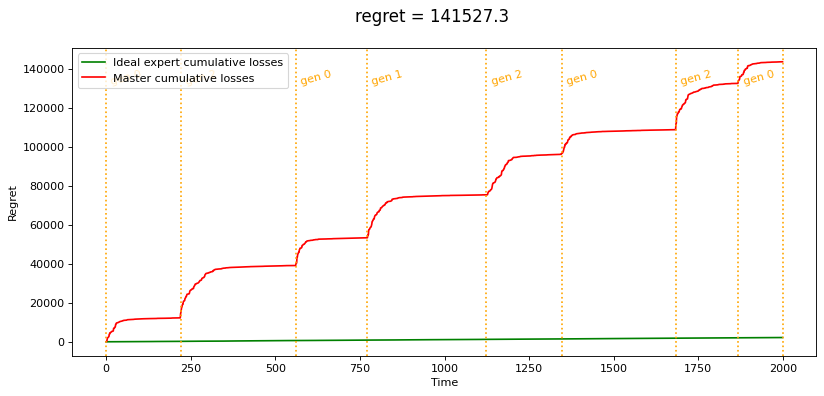

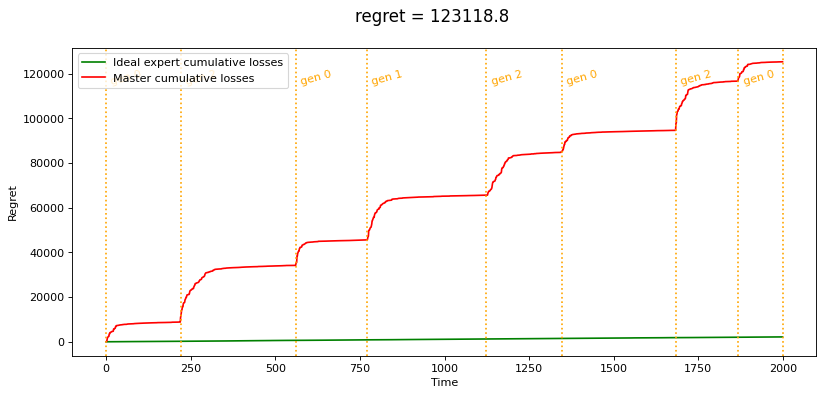

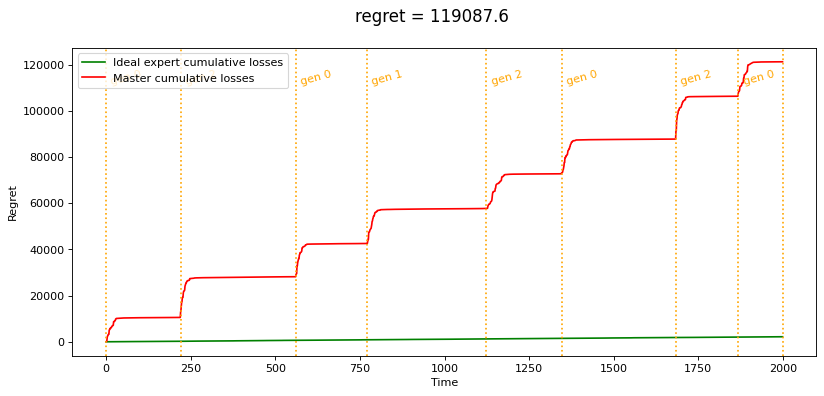

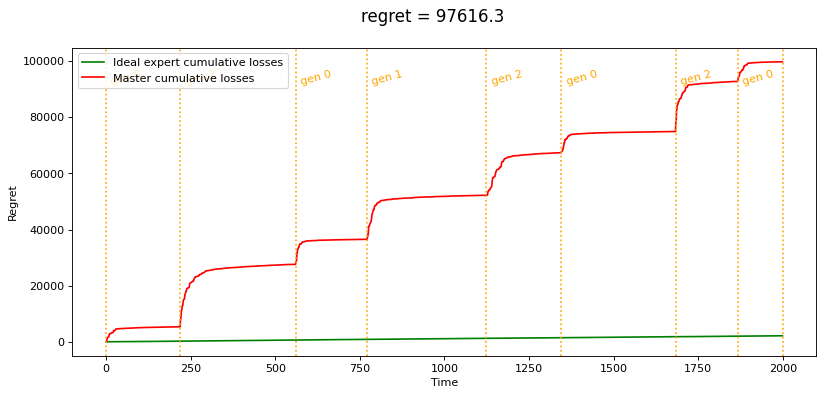

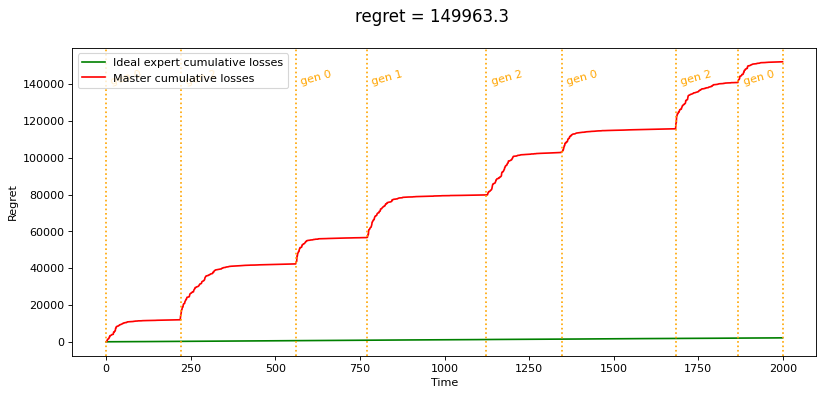

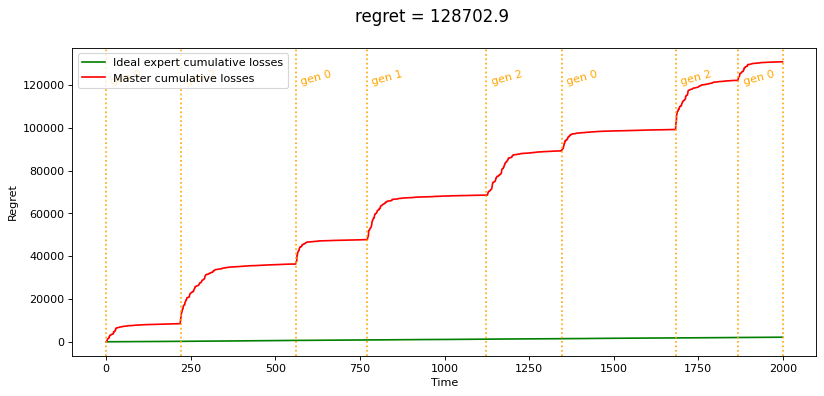

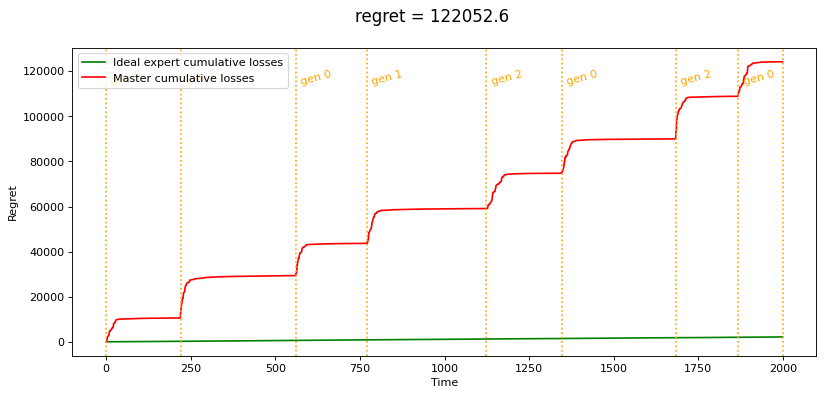

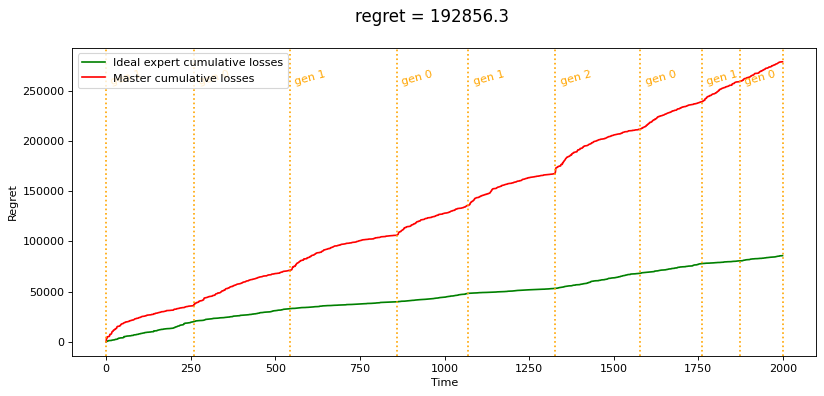

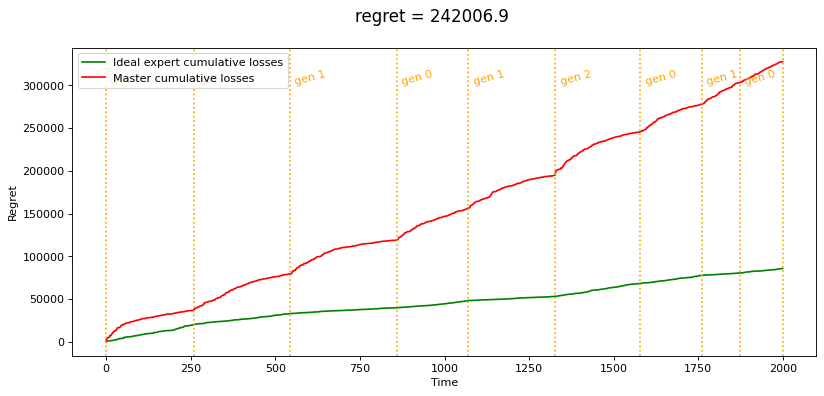

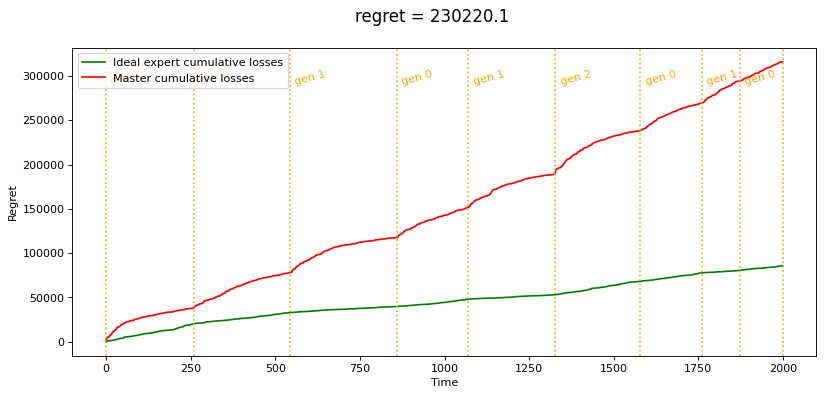

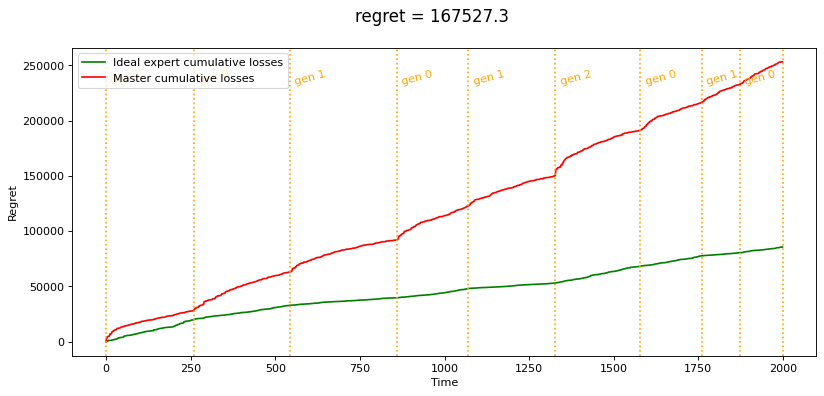

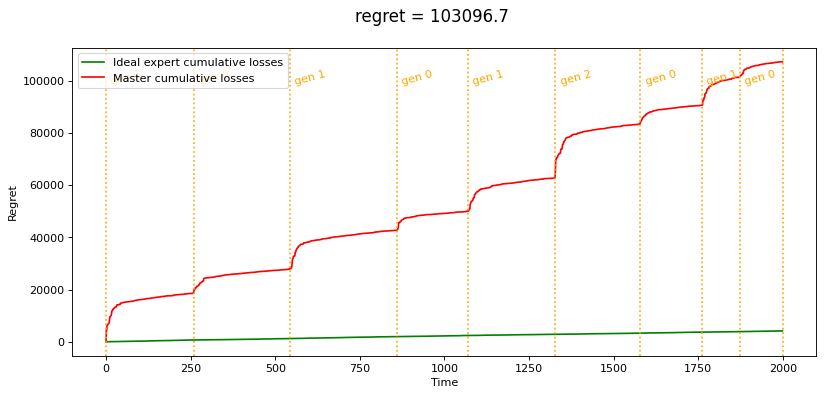

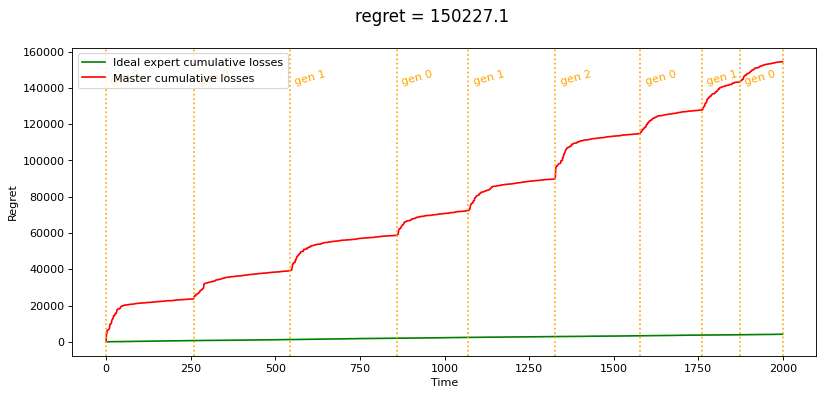

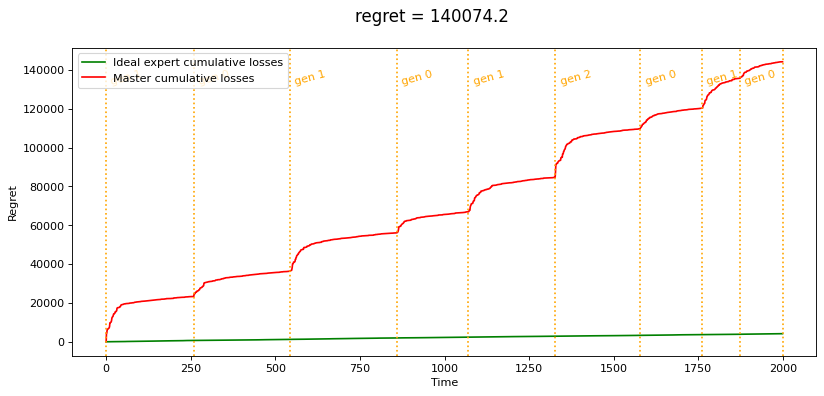

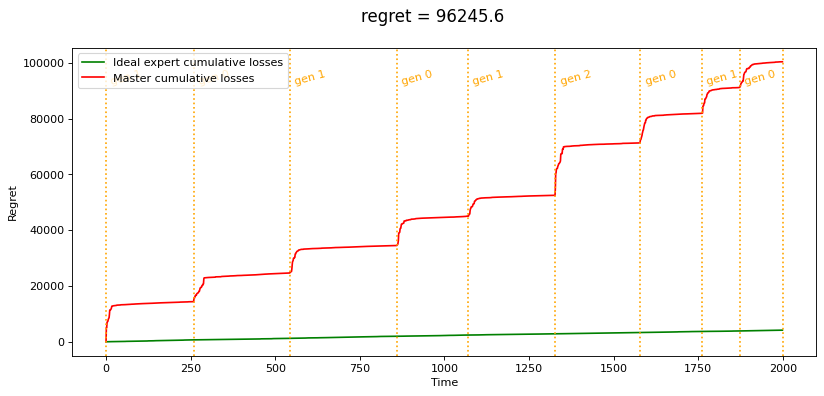

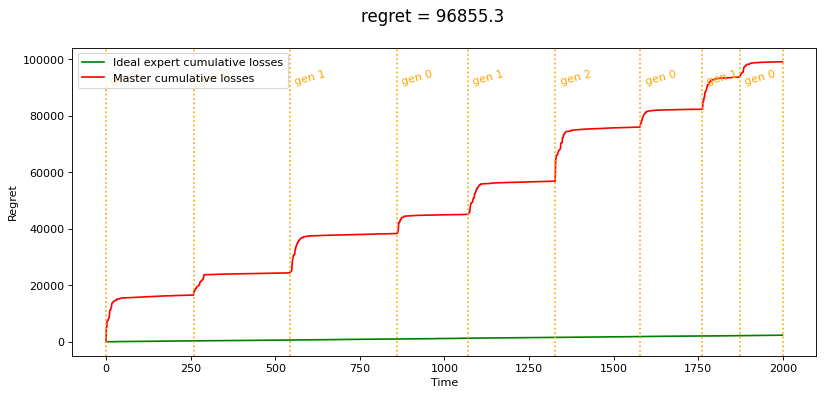

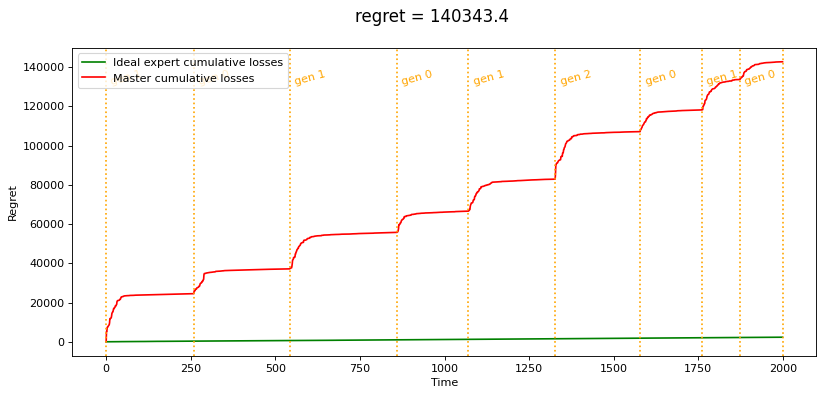

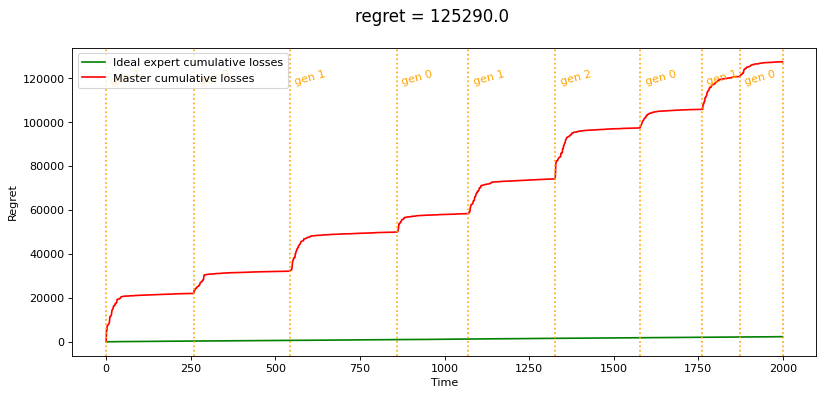

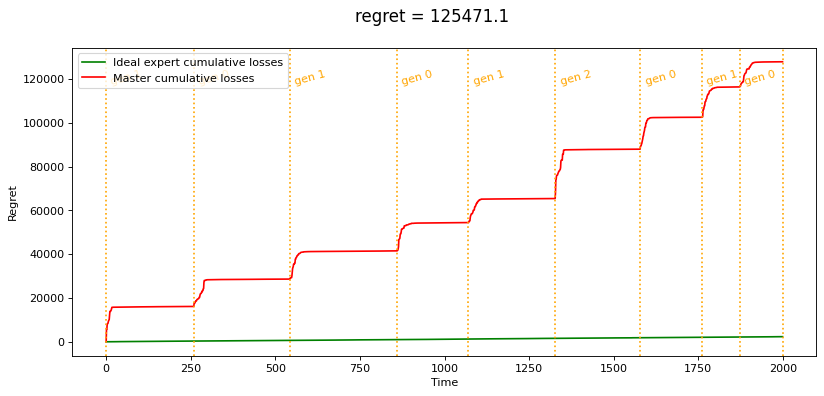

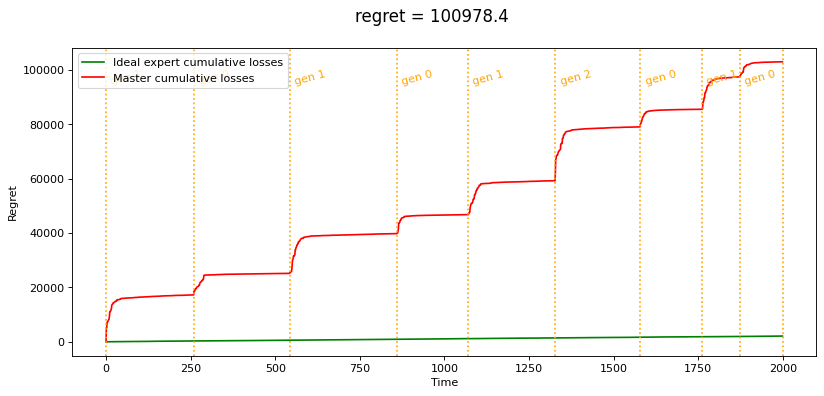

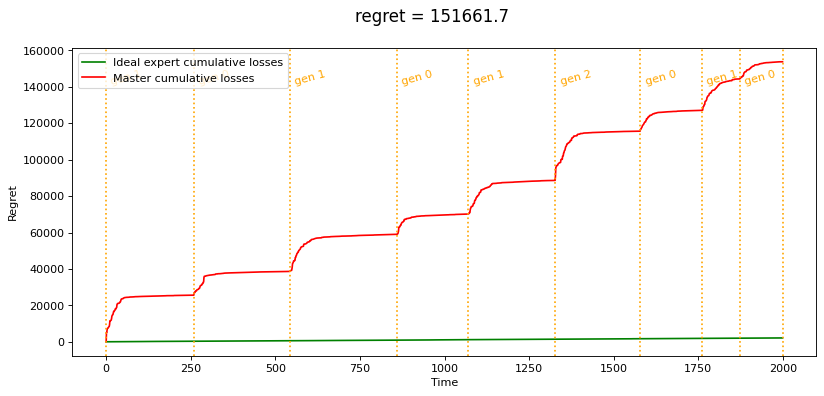

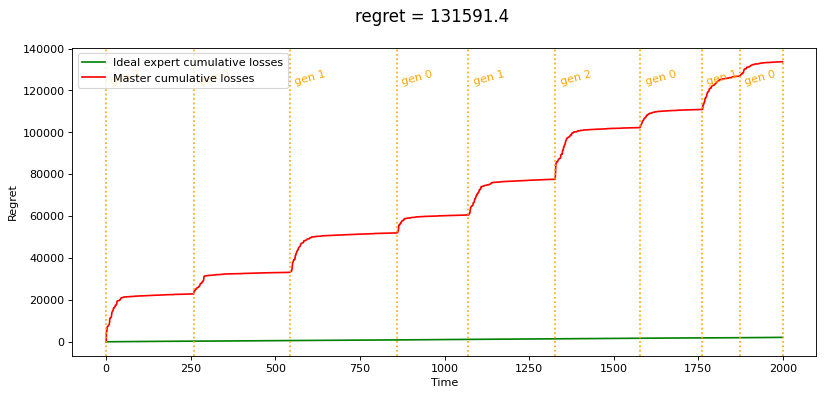

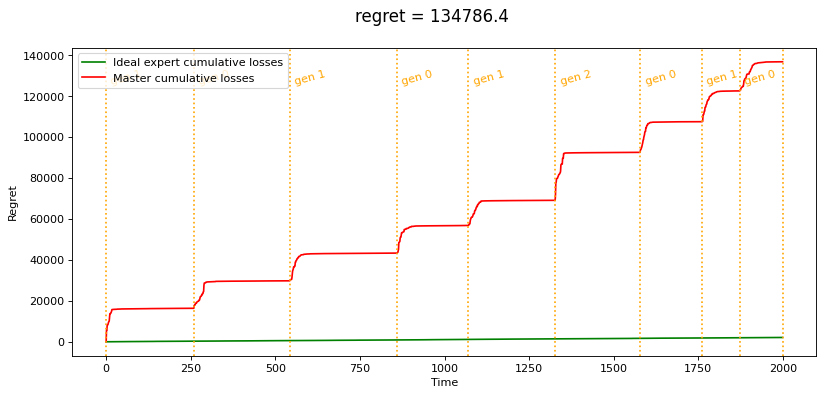

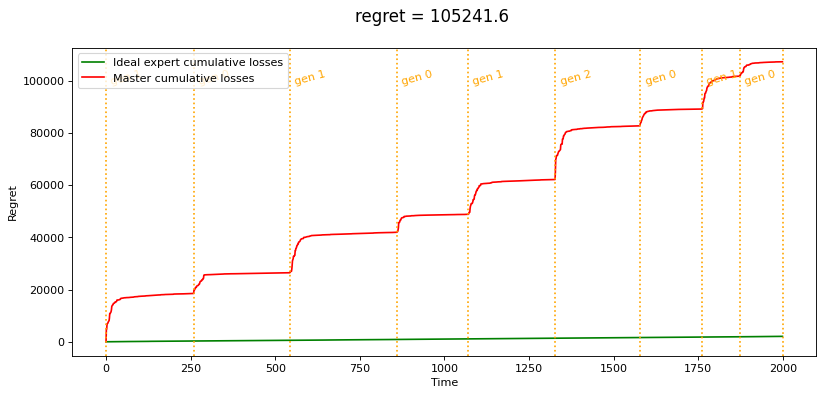

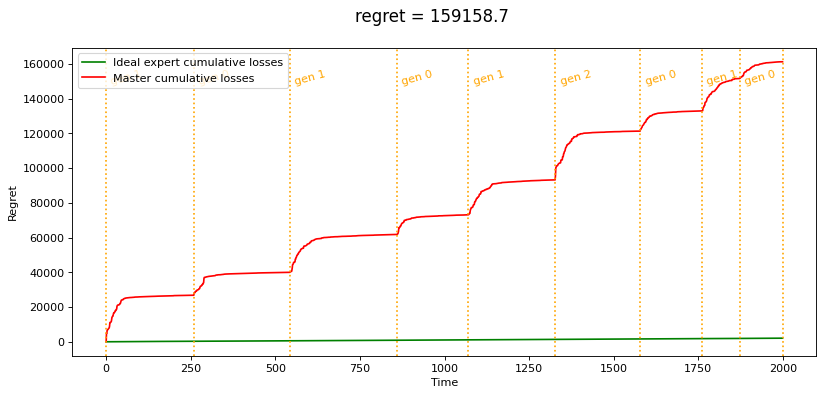

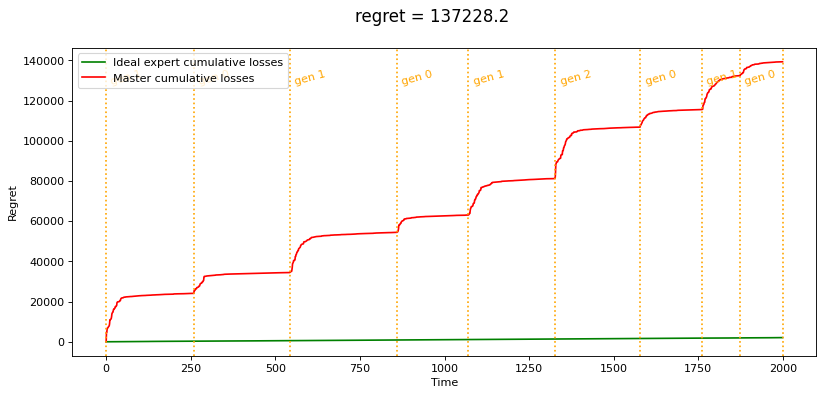

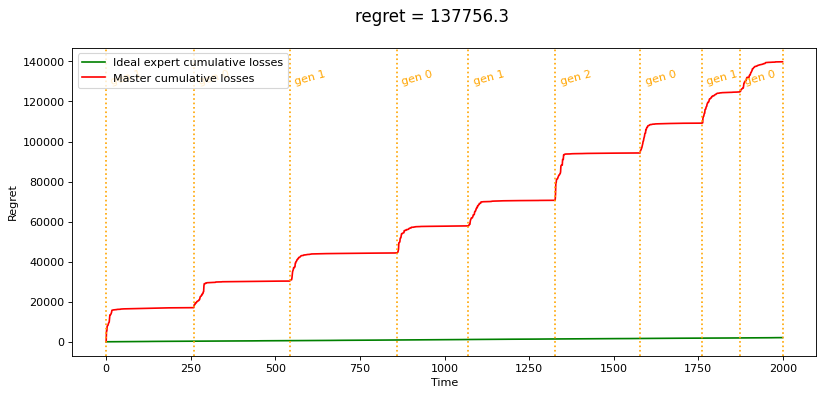

In [7]:
for experiment in experiments:
    draw_all(experiment.logs, show=["master", "ideal"], show_experts=[], show_axes=["regret"], height_ratios=[1], 
              suptitle=f"regret = {experiment.regret:.1f}", fig_size=(12, 5))